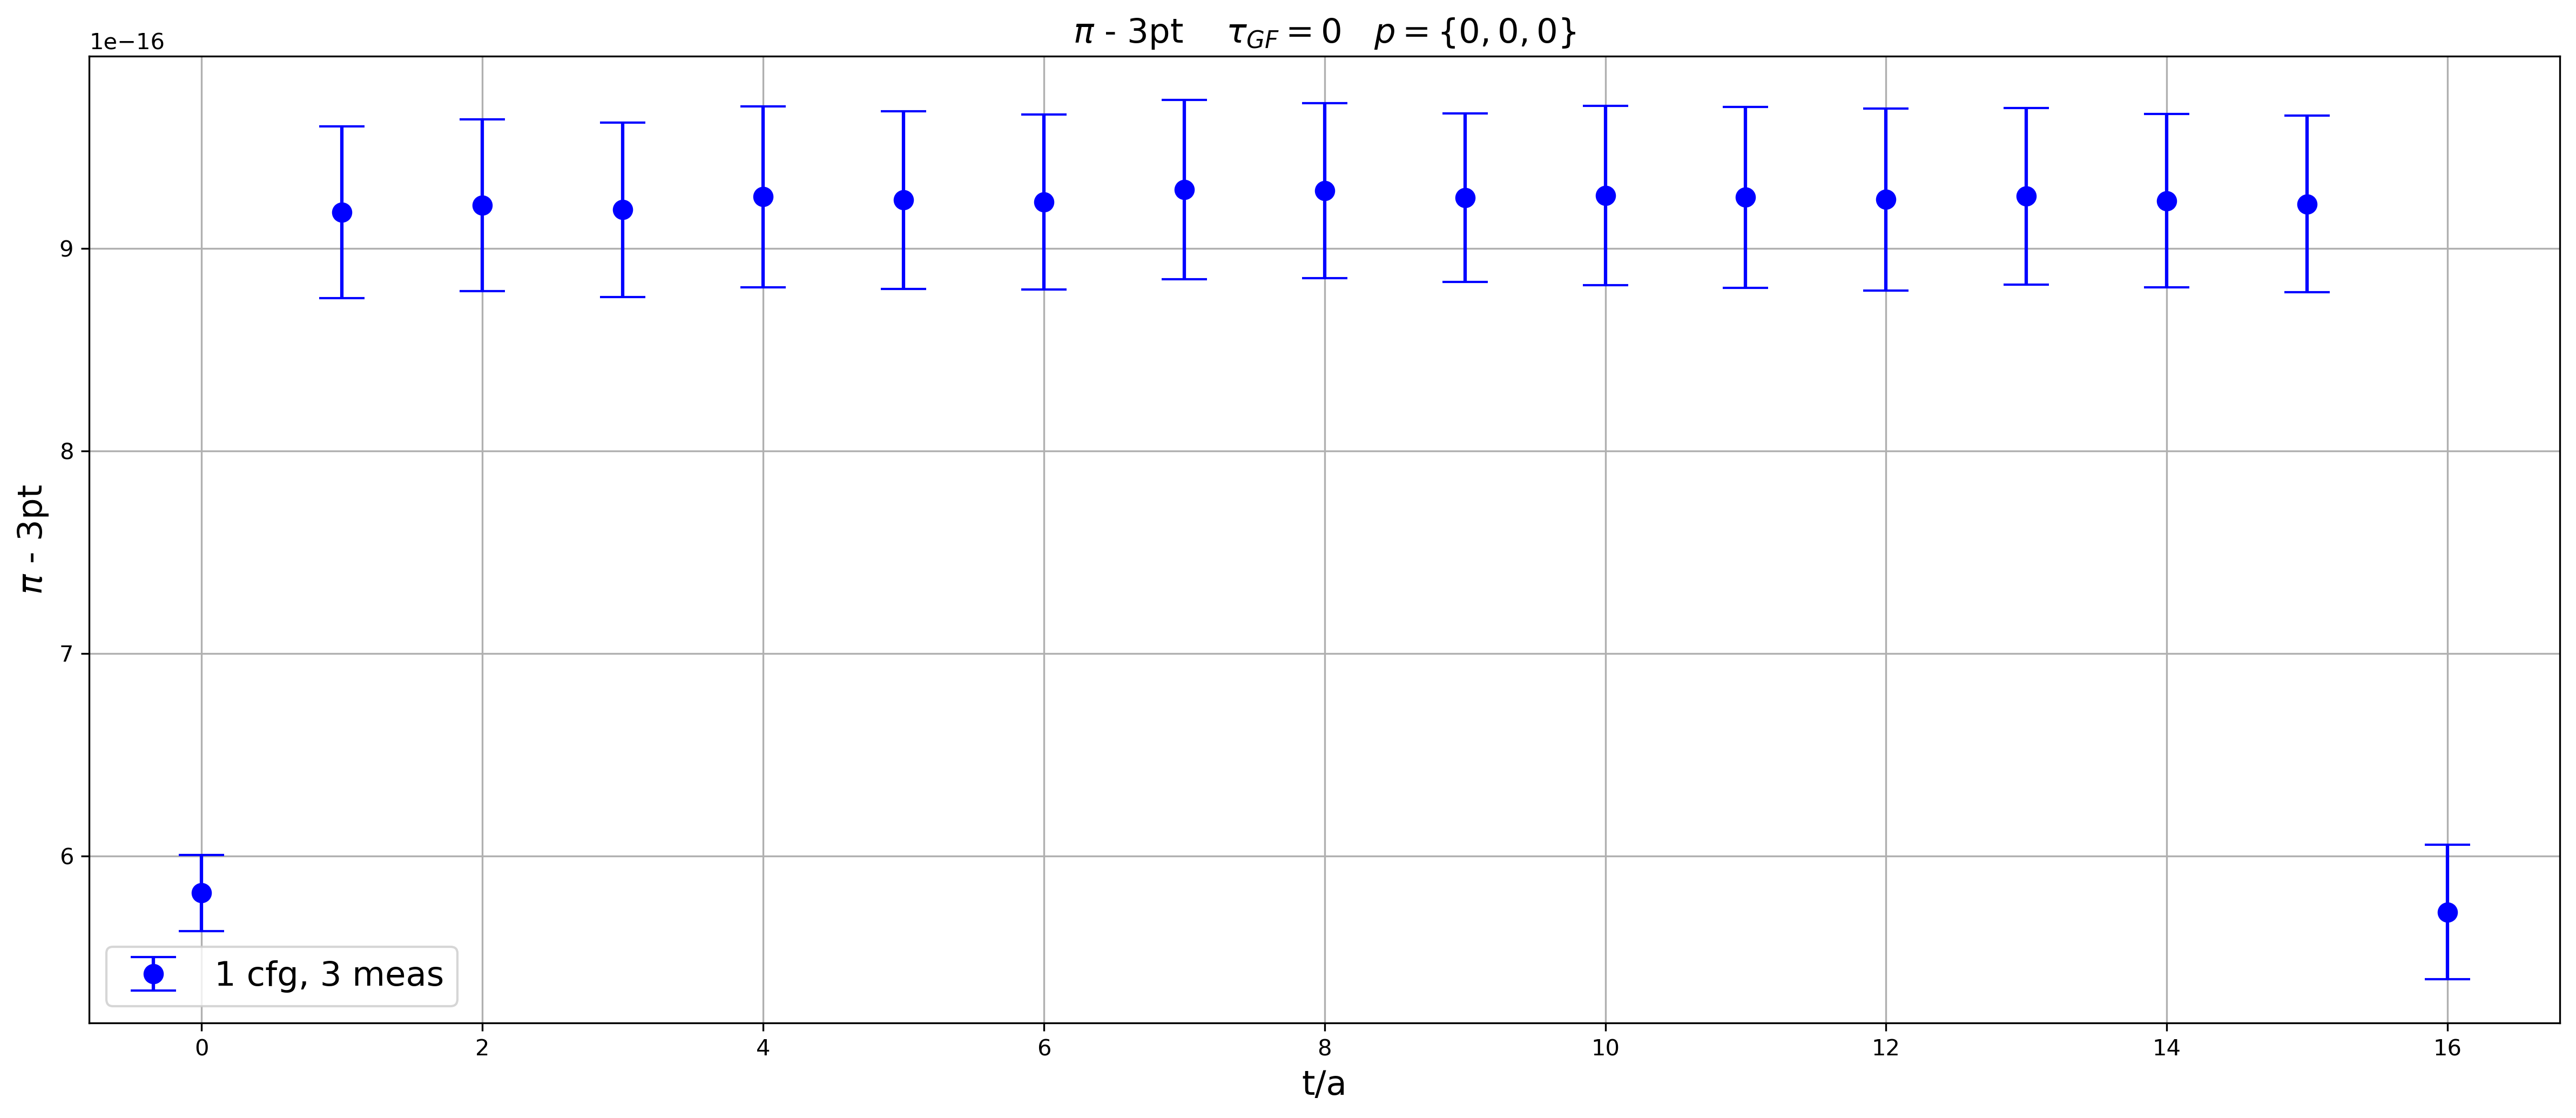

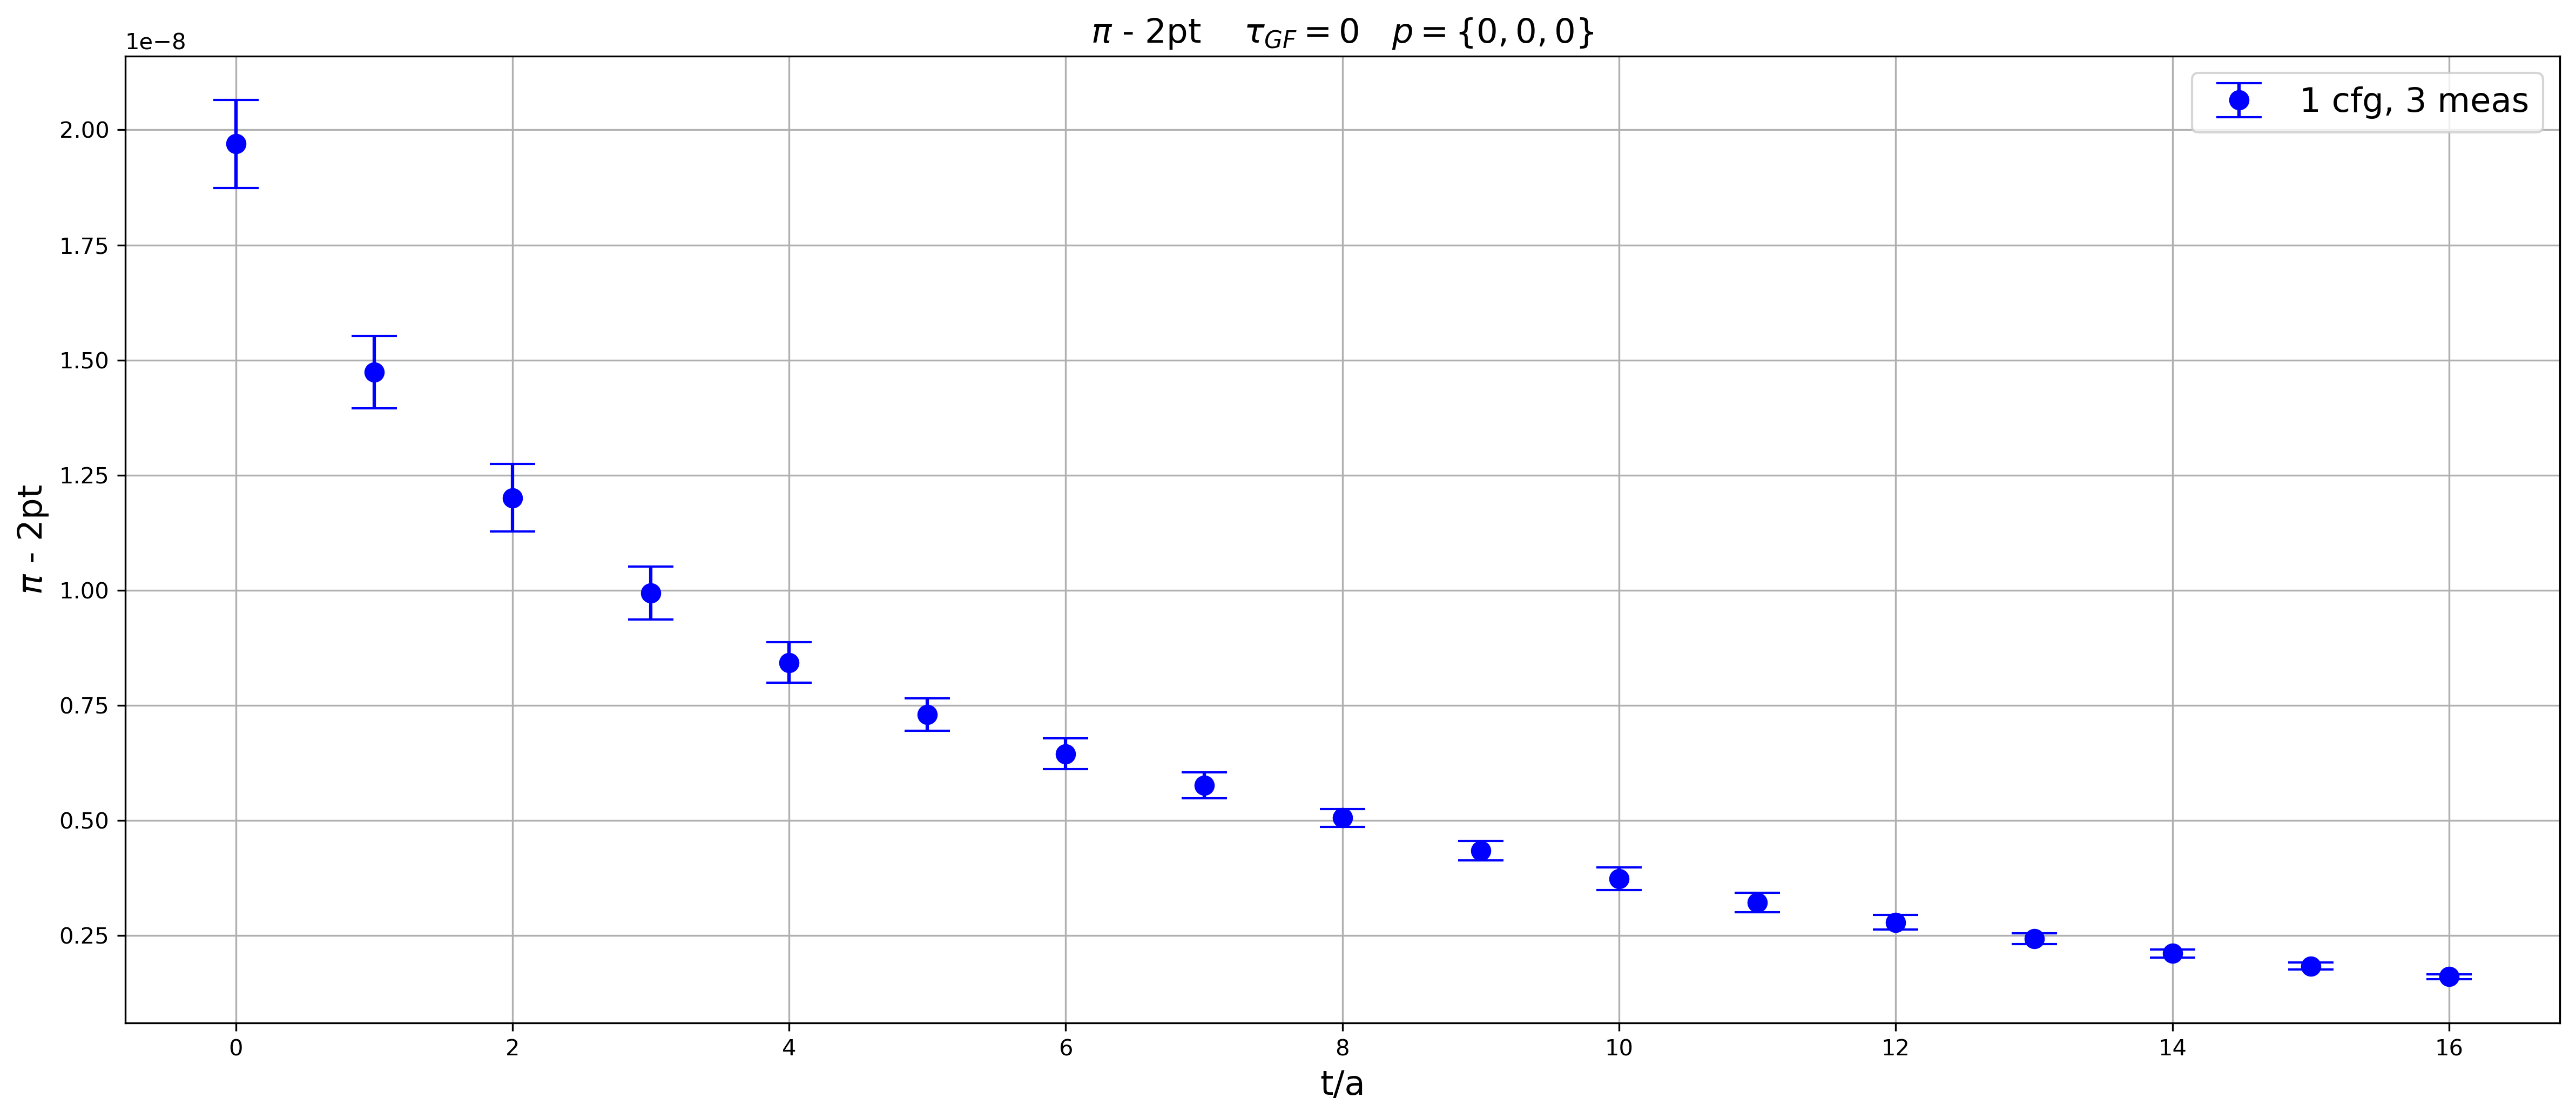

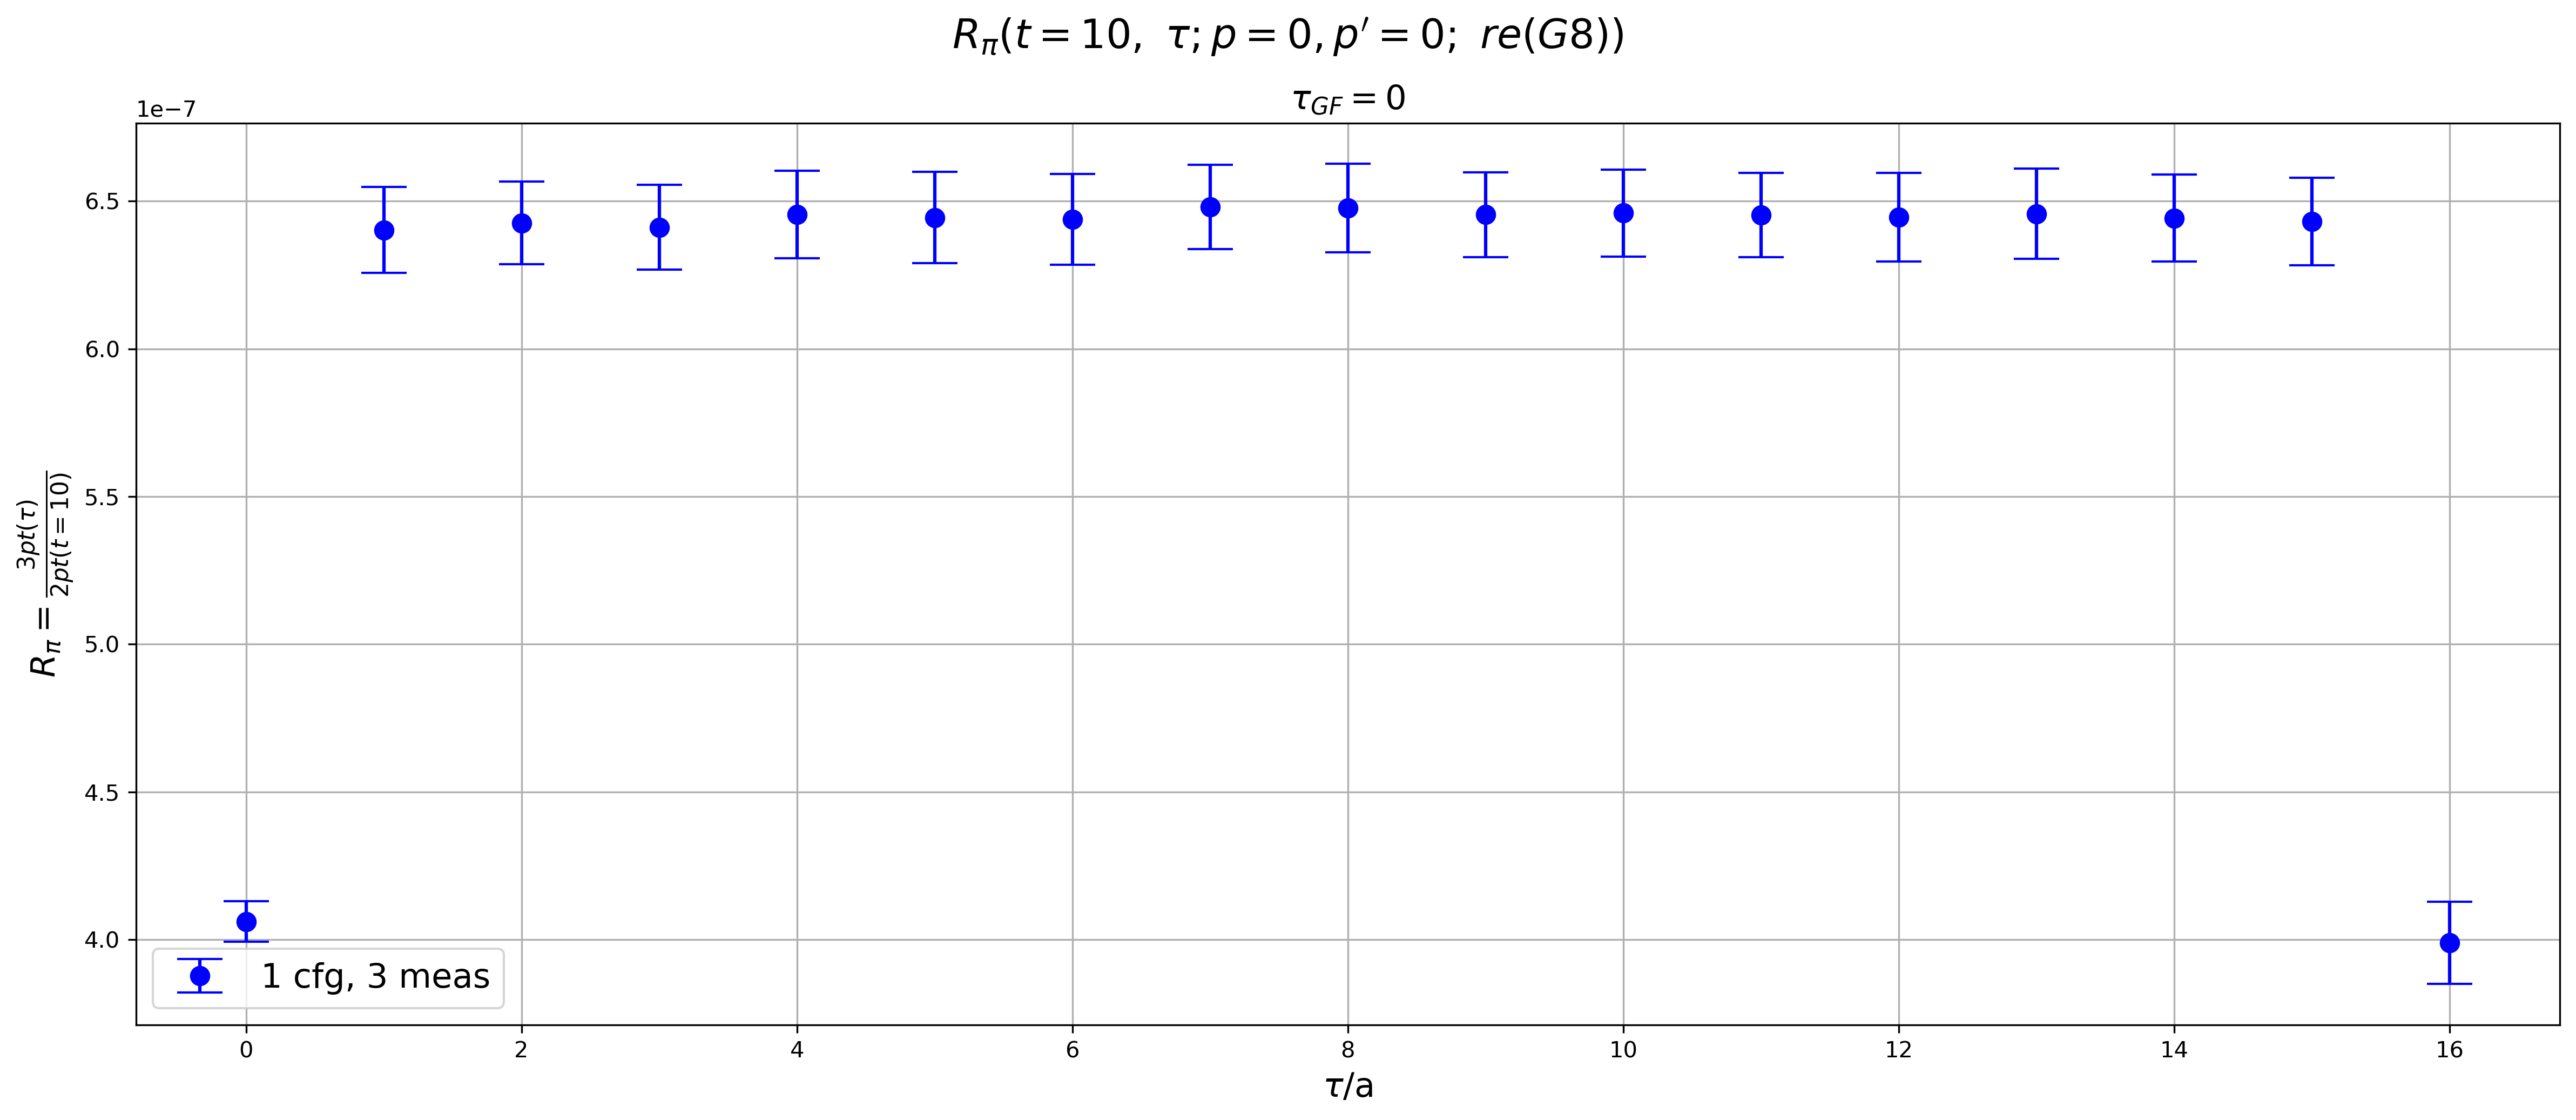

In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py
# Parse the XML file


def Jackknife(datalist):
    N = len(datalist)
    theta_bar = np.mean(datalist)
    theta_nminus_theta_bar = []
    for i in range(len(datalist)): #Jackknife
        sliced_list = datalist[:(i)] + datalist[(i+1):]
        theta_n = np.mean(sliced_list)
        theta_nminus_theta_bar.append(np.square(theta_n-theta_bar))
    sigma_sq = ((N-1)/N)*np.sum(theta_nminus_theta_bar)
    return(theta_bar, np.sqrt(sigma_sq))

snk_time = 16
    
def plot_pion_ratio_3pt2pt_flow0(Gn, Num):
    file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/pion_t{snk_time}_.h5"
    
    with h5py.File(file_path, "r") as h5_file:
        path_to_observable_cfgb = "//pion_l0_g8_qz+0_qy+0_qx+0/001"
        observable_cfgb = h5_file[path_to_observable_cfgb]
        values = observable_cfgb["re"][()]
    
    pt3_data = np.array(values)
    pt3_data1 = pt3_data[0:(snk_time+1)]
    pt3_data2 = pt3_data[42:(42+(snk_time+1))]
    pt3_data3 = pt3_data[84:(84+(snk_time+1))]
    
    pt2_tree = ET.parse("/pscratch/sd/h/hari_8/nEDM_project_LANL/hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_HP.dat.xml")
    pt2_root = pt2_tree.getroot()
    pt2_values = []
    for elem in pt2_root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='15']/momenta/elem[sink_mom_num='0']/mesprop/"):
        pt2_Num_value = elem.find("re").text
        pt2_values.append(float(pt2_Num_value))
    
    pt2_data = np.array(pt2_values)
    pt2_data1 = pt2_data[(snk_time+1)]
    pt2_data2 = pt2_data[(42+(snk_time+1))]
    pt2_data3 = pt2_data[(84+(snk_time+1))]
    
    JK_value = []
    JK_err = []
    for tau in range(len(pt3_data1)):
        JK_value_err = Jackknife([pt3_data1[tau]/pt2_data1, pt3_data2[tau]/pt2_data2, pt3_data3[tau]/pt2_data3])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    
    time_plt = np.arange(len(pt3_data1))
    plt.figure(figsize=(16, 7), dpi=300)
    plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt='o', markersize=8, capsize=10, color='blue', label="1 cfg, 3 meas")
    plt.xlabel("$\\tau$/a", fontsize=15)
    plt.ylabel("$R_{\\pi}=\\frac{3pt(\\tau)}{2pt(t=10)}$", fontsize=15)
    plt.suptitle("$R_{\\pi}(t=10,~\\tau;p=0,p^{\\prime}=0;~%s (%s))$" % (Num, Gn), fontsize=18)
    plt.title("$\\tau_{GF} = 0$", fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    print(" ")


def plot_pion_2pt_flow0():
    tree = ET.parse("/pscratch/sd/h/hari_8/nEDM_project_LANL/hadspec_Pavg_.cfg12000_t0x15y3z4_t42x31y3z4_t84x47y3z4_HP.dat.xml")
    root = tree.getroot()
    values = []
    for elem in root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='15']/momenta/elem[sink_mom_num='0']/mesprop/"):
        Num_value = elem.find("re").text
        values.append(float(Num_value))
    data = np.array(values)
    data1 = data[0:(snk_time+1)]
    data2 = data[42:(42+(snk_time+1))]
    data3 = data[84:(84+(snk_time+1))]
    JK_value = []
    JK_err = []
    for tau in range(len(data1)):
        JK_value_err = Jackknife([data1[tau], data2[tau], data3[tau]])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    time_plt = np.arange(len(data1))
    plt.figure(figsize=(16, 7),dpi=300)
    plt.errorbar(time_plt, JK_value, yerr = JK_err, fmt='o', markersize=8, capsize=10, color='blue', label= "1 cfg, 3 meas")
    plt.xlabel("t/a", fontsize=15)
    plt.ylabel("$\\pi$ - 2pt", fontsize=15)
    plt.title("$\\pi$ - 2pt    $\\tau_{GF} = 0$   $p=\{0,0,0\}$", fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True) 
    plt.show()
    print(" ")

def plot_pion_3pt_flow0():
    file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/pion_t{snk_time}_.h5"
    
    with h5py.File(file_path, "r") as h5_file:
        path_to_observable_cfgb = "//pion_l0_g8_qz+0_qy+0_qx+0/001"
        observable_cfgb = h5_file[path_to_observable_cfgb]
        values = observable_cfgb["re"][()]
    
    data = np.array(values)
    data1 = data[0:(snk_time+1)]
    data2 = data[42:(42+(snk_time+1))]
    data3 = data[84:(84+(snk_time+1))]
    
    JK_value = []
    JK_err = []
    for tau in range(len(data1)):
        JK_value_err = Jackknife([data1[tau], data2[tau], data3[tau]])
        JK_value.append(JK_value_err[0])
        JK_err.append(JK_value_err[1])
    
    time_plt = np.arange(len(data1))
    plt.figure(figsize=(16, 7), dpi=300)
    plt.errorbar(time_plt, JK_value, yerr=JK_err, fmt='o', markersize=8, capsize=10, color='blue', label="1 cfg, 3 meas")
    plt.xlabel("t/a", fontsize=15)
    plt.ylabel("$\\pi$ - 3pt", fontsize=15)
    plt.title("$\\pi$ - 3pt    $\\tau_{GF} = 0$   $p=\\{0,0,0\\}$", fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    
    print(" ")


plot_pion_3pt_flow0()
plot_pion_2pt_flow0()
plot_pion_ratio_3pt2pt_flow0("G8", "re")
